## Jars

This is the B model of a puzzle from the movie "Die Hard with a Vengeance":
 https://www.youtube.com/watch?v=BVtQNK_ZUJg
 http://www.math.tamu.edu/~dallen/hollywood/diehard/diehard.htm
 
Input:
* one 3 gallon and one 5 gallon jug
* and we need to measure precisely 4 gallons
We can 
* empty a jug,
* completely fill any jug and
* transfer water from one jug to another until either the destination jug is full or the source jug is empty.

Here is a generic B model with three operations ```FillJar```, ```EmptyJar``` and ```Transfer```.
It hase one variable ```level``` for the current level of the jars.
The constant ```maxf``` defines for each jar the maximum fill level in gallons.

In [1]:
::load
MACHINE Jars
DEFINITIONS
  GOAL == (4:ran(level));
  ANIMATION_IMG1 == "images/Filled.gif";
  ANIMATION_IMG2 == "images/Empty.gif";
  ANIMATION_IMG3 == "images/Void.gif";
  gmax == max(ran(maxf));
  ANIMATION_FUNCTION_DEFAULT == {r,c,i | c:Jars & r:1..gmax & i=3};
  ri == (gmax+1-r);
  ANIMATION_FUNCTION == {r,c,i | c:Jars & ri:1..maxf(c) &
                                 (ri<=level(c) => i=1 ) & (ri>level(c) => i=2)};
SETS
 Jars = {j3,j5}
CONSTANTS maxf
PROPERTIES maxf : Jars --> NATURAL &
           maxf = {j3 |-> 3, j5 |-> 5} /* in this puzzle we have two jars, with capacities 3 and 5 */
VARIABLES level
INVARIANT
  level: Jars --> NATURAL
INITIALISATION level := Jars * {0}  /* all jars start out empty */
OPERATIONS
  FillJar(j) = /* we can completely fill a jar j */
   PRE j:Jars & level(j)<maxf(j) THEN
    level(j) := maxf(j)
   END;
  EmptyJar(j) = /* we can completely empty a jar j */
   PRE j:Jars & level(j)>0 THEN
    level(j) := 0
   END;
  Transfer(j1,amount,j2) = /* we can transfer from jar j1 to j2 until either j2 is full or j1 is empty */
   PRE j1:Jars & j2:Jars & j1 /= j2 & amount>0 &
                               amount = min({level(j1), maxf(j2)-level(j2)}) THEN
      level := level <+ { j1|-> level(j1)-amount, j2 |-> level(j2)+amount }
   END
END

Loaded machine: Jars

In [2]:
:constants

Machine constants set up using operation 0: $setup_constants()

In [3]:
:init

Machine initialised using operation 1: $initialise_machine()

We start off with all jars being empty:

In [4]:
level

$\{(\mathit{j3}\mapsto 0),(\mathit{j5}\mapsto 0)\}$

We now fill the 5 gallon jar using the operation FillJar with parameter j:

In [5]:
:exec FillJar j=j5

Executed operation: FillJar(j5)

This jar is now full:

In [6]:
level

$\{(\mathit{j3}\mapsto 0),(\mathit{j5}\mapsto 5)\}$

We can inspect the state graphically using the defined ANIMATION_FUNCTION:

In [7]:
:show

<table style="font-family:monospace"><tbody>
<tr>
<td style="padding:0px"><img alt="3" src="images/Void.gif"/></td>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="3" src="images/Void.gif"/></td>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="2" src="images/Empty.gif"/></td>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="2" src="images/Empty.gif"/></td>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="2" src="images/Empty.gif"/></td>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
</tr>
</tbody></table>

We now transfer water to the empty jar until it is filled using the operation FillJar with parameters j1, amount and j2:

In [8]:
:exec Transfer (j1=j5 & amount=3 & j2=j3)

Executed operation: Transfer(j5,3,j3)

In [9]:
level

$\{(\mathit{j3}\mapsto 3),(\mathit{j5}\mapsto 2)\}$

In [10]:
:show

<table style="font-family:monospace"><tbody>
<tr>
<td style="padding:0px"><img alt="3" src="images/Void.gif"/></td>
<td style="padding:0px"><img alt="2" src="images/Empty.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="3" src="images/Void.gif"/></td>
<td style="padding:0px"><img alt="2" src="images/Empty.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
<td style="padding:0px"><img alt="2" src="images/Empty.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
</tr>
</tbody></table>

We now empty the three gallon jar using the operation EmptyJar with parameter j:

In [11]:
:exec EmptyJar j=j3

Executed operation: EmptyJar(j3)

In [12]:
:show

<table style="font-family:monospace"><tbody>
<tr>
<td style="padding:0px"><img alt="3" src="images/Void.gif"/></td>
<td style="padding:0px"><img alt="2" src="images/Empty.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="3" src="images/Void.gif"/></td>
<td style="padding:0px"><img alt="2" src="images/Empty.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="2" src="images/Empty.gif"/></td>
<td style="padding:0px"><img alt="2" src="images/Empty.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="2" src="images/Empty.gif"/></td>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="2" src="images/Empty.gif"/></td>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
</tr>
</tbody></table>

In [13]:
:exec Transfer (j1=j5 & amount=2 & j2=j3)

Executed operation: Transfer(j5,2,j3)

In [14]:
:show

<table style="font-family:monospace"><tbody>
<tr>
<td style="padding:0px"><img alt="3" src="images/Void.gif"/></td>
<td style="padding:0px"><img alt="2" src="images/Empty.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="3" src="images/Void.gif"/></td>
<td style="padding:0px"><img alt="2" src="images/Empty.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="2" src="images/Empty.gif"/></td>
<td style="padding:0px"><img alt="2" src="images/Empty.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
<td style="padding:0px"><img alt="2" src="images/Empty.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
<td style="padding:0px"><img alt="2" src="images/Empty.gif"/></td>
</tr>
</tbody></table>

In [15]:
:exec FillJar j=j5

Executed operation: FillJar(j5)

In [16]:
:show

<table style="font-family:monospace"><tbody>
<tr>
<td style="padding:0px"><img alt="3" src="images/Void.gif"/></td>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="3" src="images/Void.gif"/></td>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="2" src="images/Empty.gif"/></td>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
</tr>
</tbody></table>

In [17]:
:exec Transfer j1=j5 & amount=1 & j2=j3

Executed operation: Transfer(j5,1,j3)

In [18]:
:show

<table style="font-family:monospace"><tbody>
<tr>
<td style="padding:0px"><img alt="3" src="images/Void.gif"/></td>
<td style="padding:0px"><img alt="2" src="images/Empty.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="3" src="images/Void.gif"/></td>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
</tr>
<tr>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
<td style="padding:0px"><img alt="1" src="images/Filled.gif"/></td>
</tr>
</tbody></table>

The puzzle has now been solve, the goal predicate has become true:

In [19]:
GOAL

$\mathit{TRUE}$

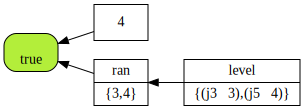

In [20]:
:dot goal